<a href="https://colab.research.google.com/github/Malekkamoua/PFE/blob/main/.addixo/0_Cleaning_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path_protocol = '/content/gdrive/MyDrive/Datascience/PFE/Data/merged_pp.txt'
path_alarm = '/content/gdrive/MyDrive/Datascience/PFE/Data/alarm_merged_new.txt'

In [ ]:
import re

# Using readlines()
file1 = open(path_protocol, 'r')
Lines = file1.readlines()
  
count = 0

opened_file = open('/content/modified_pp.txt', 'a')

for line in Lines:
    count += 1
    line = re.sub('  +', ' ', line)
    line  = line + '\n'
    
    opened_file.write(line)
    #print("Line{}: {}".format(count, line.strip()))
print('finish')
opened_file.close()


finish


In [ ]:
import pandas as pd

# read text file into pandas DataFrame
df = pd.read_csv("modified_pp.txt", sep=" ", header=None, 
                 names=['cpt_cyc_protocoles', 't008', 't007', 'nb_total_pieces', 'cpt_cyc_machine',
                        'temps_cycle', 'temps_dosage' , 'temps_injection' , 'pression_com', 'volume_com' ,'matelas','val_pointe','integral'])
  
# display DataFrame
df.head()

,cpt_cyc_protocoles,t008,t007,nb_total_pieces,cpt_cyc_machine,temps_cycle,temps_dosage,temps_injection,pression_com,volume_com,matelas,val_pointe,integral
0,7583,2.01,22:30,30688,7672,27.50,-,3.57,779,16.5,10.87,1062,76
1,7584,2.01,22:31,30692,7673,28.39,5.37,3.56,1315,16.5,16.27,1334,126
2,7585,2.01,22:31,30696,7674,27.28,4.36,3.57,1332,16.5,16.28,1344,125
3,7586,2.01,22:35,30728,7682,26.95,4.11,3.56,1353,16.5,16.27,1371,128
4,7587,2.01,22:35,30732,7683,26.98,4.09,3.55,1354,16.5,16.26,1374,130


In [ ]:
df['t008'] = df['t008'].astype(str).str.replace('.','/')
df['t008'] = df['t008'] + '/2022 '
df["date"] = df["t008"].astype(str) + df["t007"]
df['date'] = df['date'].astype('datetime64[ns]')
df.drop(['t008', 't007'], axis=1, inplace=True)

my_column = df.pop('date')
df.insert(0, my_column.name, my_column) 
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,date,cpt_cyc_protocoles,nb_total_pieces,cpt_cyc_machine,temps_cycle,temps_dosage,temps_injection,pression_com,volume_com,matelas,val_pointe,integral
0,2022-02-01 22:30:00,7583,30688,7672,27.50,-,3.57,779,16.5,10.87,1062,76
1,2022-02-01 22:31:00,7584,30692,7673,28.39,5.37,3.56,1315,16.5,16.27,1334,126
2,2022-02-01 22:31:00,7585,30696,7674,27.28,4.36,3.57,1332,16.5,16.28,1344,125
3,2022-02-01 22:35:00,7586,30728,7682,26.95,4.11,3.56,1353,16.5,16.27,1371,128
4,2022-02-01 22:35:00,7587,30732,7683,26.98,4.09,3.55,1354,16.5,16.26,1374,130
...,...,...,...,...,...,...,...,...,...,...,...,...
94523,2022-03-28 12:24:00,102110,414096,103524,27.04,4.06,3.49,1351,16.5,16.39,1363,144
94524,2022-03-28 12:24:00,102111,414100,103525,27.07,4.03,3.48,1349,16.5,16.34,1369,143
94525,2022-03-28 12:25:00,102112,414104,103526,27.00,4.02,3.48,1344,16.5,16.39,1359,144
94526,2022-03-28 12:25:00,102113,414108,103527,27.05,4.04,3.48,1352,16.5,16.40,1365,144


In [ ]:
# computing number of rows
rows = len(df.axes[0])
  
# computing number of columns
cols = len(df.axes[1])
  
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  94528
Number of Columns:  12


In [ ]:
object_columns = (df
                  .select_dtypes(include="float64")
                  .columns)

for column in object_columns:
    print("{} has {} unique values."
          .format(column, 
                  df[column]
                  .nunique()))

temps_cycle has 143 unique values.
temps_injection has 14 unique values.
volume_com has 7 unique values.
matelas has 138 unique values.


In [ ]:
print(df.shape)
print(list(df.columns))
print(df.duplicated())
df.drop_duplicates(keep = False, inplace = True)
print(df.shape)

(94528, 12)
['date', 'cpt_cyc_protocoles', 'nb_total_pieces', 'cpt_cyc_machine', 'temps_cycle', 'temps_dosage', 'temps_injection', 'pression_com', 'volume_com', 'matelas', 'val_pointe', 'integral']
0        False
1        False
2        False
3        False
4        False
         ...  
94523    False
94524    False
94525    False
94526    False
94527    False
Length: 94528, dtype: bool
(94528, 12)


In [ ]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent],
                              axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = (mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1))

    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

missing_values_table(df)

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


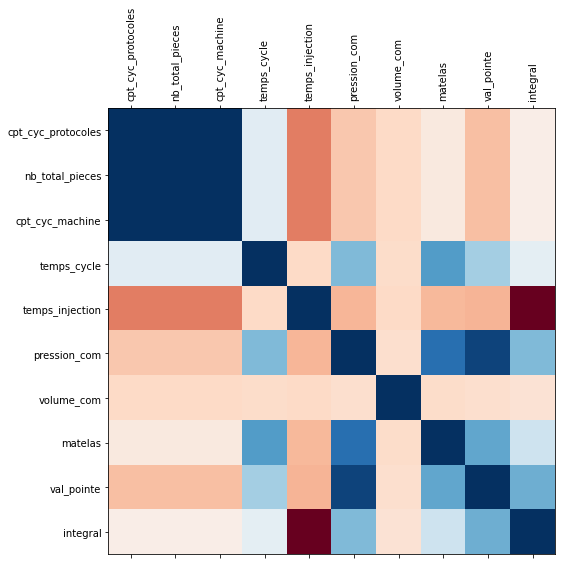

In [ ]:
corr = df.corr()

fig = plt.figure(figsize=(8,8)) 

plt.matshow(corr, cmap='RdBu', fignum=fig.number) 
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

In [ ]:
# read text file into pandas DataFrame
df_alarm = pd.read_csv(path_alarm, sep=",", header=None, 
                 names=['date_alarm', 'time' ,'alarm'])
  
# display DataFrame
df_alarm.head(3)

,date_alarm,time,alarm
0,02/01/22,14:29:24,S195 Arrêt d'urgence système de robots ...
1,03/01/22,08:58:14,t4052 Temps sécurité moule valeur réelle supé...
2,03/01/22,08:58:21,t4052 Temps sécurité moule valeur réelle supé...


In [ ]:
df_alarm['time'] = df_alarm['time'].str[:6]
df_alarm["date"] = df_alarm["date_alarm"].astype(str) + df_alarm["time"]
df_alarm['date'] = df_alarm['date'].astype('datetime64[ns]')
df_alarm.drop(['date_alarm', 'time'], axis=1, inplace=True)

my_column = df_alarm.pop('date')
df_alarm.insert(0, my_column.name, my_column) 

In [ ]:
df_alarm

,date,alarm
0,2022-02-01 14:29:00,S195 Arrêt d'urgence système de robots ...
1,2022-03-01 08:58:00,t4052 Temps sécurité moule valeur réelle supé...
2,2022-03-01 08:58:00,t4052 Temps sécurité moule valeur réelle supé...
3,2022-03-01 09:37:00,t4052 Temps sécurité moule valeur réelle supé...
4,2022-03-01 09:37:00,t4052 Temps sécurité moule valeur réelle supé...
...,...,...
124,2022-03-24 06:39:00,t4052 Temps sécurité moule valeur réelle supé...
125,2022-03-24 06:39:00,t4052 Temps sécurité moule valeur réelle supé...
126,2022-03-27 15:49:00,S195 Arrêt d'urgence système de robots
127,2022-03-29 06:32:00,S195 Arrêt d'urgence système de robots


In [ ]:
df.to_csv('/content/gdrive/MyDrive/Datascience/PFE/datasets/addixo/protocol_2022.csv', index=True)
df_alarm.to_csv('/content/gdrive/MyDrive/Datascience/PFE/datasets/addixo/alarm_2022.csv', index=True)

In [ ]:
protocol_df = pd.read_csv('/content/gdrive/MyDrive/Datascience/PFE/datasets/addixo/protocol_2022.csv', parse_dates=['date'],infer_datetime_format=True)
alarm_df = pd.read_csv('/content/gdrive/MyDrive/Datascience/PFE/datasets/addixo/alarm_2022.csv', parse_dates=['date'],  infer_datetime_format=True)

In [ ]:
protocol_df.drop(['Unnamed: 0'], axis=1, inplace=True)
alarm_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
protocol_df

In [ ]:
protocol_df['date'] = pd.to_datetime(protocol_df['date'])
alarm_df['date'] = pd.to_datetime(alarm_df['date'])

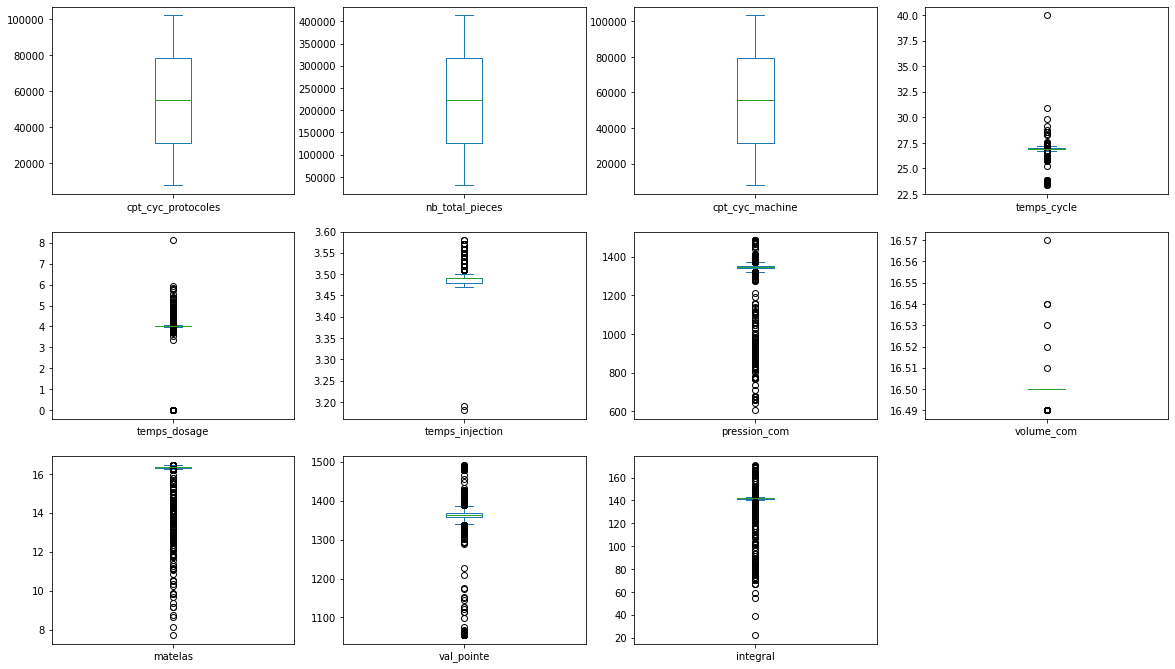

In [ ]:
protocol_df.plot(kind="box", subplots=True, layout=(5,4), figsize=(20,20));

In [ ]:
df_clean = protocol_df[1:].copy()
print(df_clean.shape)

def outlier(datacol):
  Q1, Q3 = np.percentile(datacol, [25,75])
  IQR = Q3 - Q1
  lower_outlier = Q1 - 1.5 * IQR
  upper_outlier = Q3 + 1.5 * IQR
  return lower_outlier,upper_outlier


for c in df_clean.columns:
  lower_outlier, upper_outlier = outlier(df_clean[c])
  outliers = df_clean[(df_clean[c] < lower_outlier) | (df_clean[c] > upper_outlier)]
  df_clean.drop(df_clean[ (df_clean[c] > upper_outlier) | (df_clean[c] < lower_outlier) ].index , inplace=True)

print(df_clean.shape)

(94527, 12)
(81380, 12)


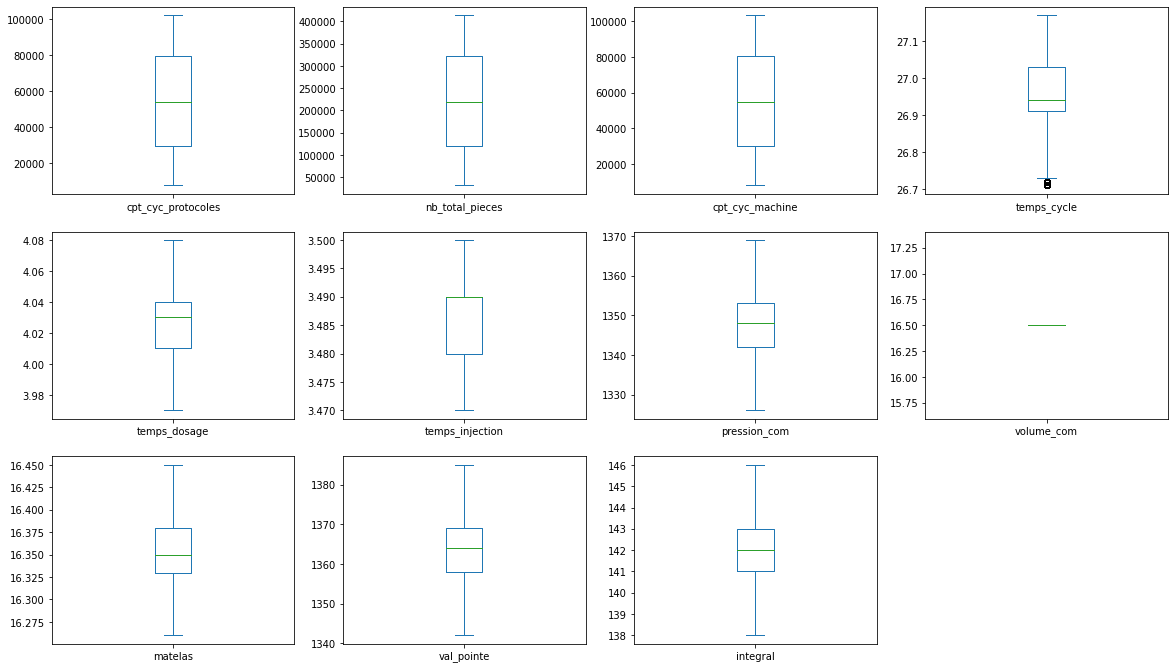

In [ ]:
df_clean.plot(kind="box", subplots=True, layout=(5,4), figsize=(20,20));

In [ ]:
protocol_df['duration'] = protocol_df[['temps_cycle', 'temps_dosage', 'temps_injection']].sum(axis=1)

def conditions(s):
    if (s['duration'] < 36.05) and (s['duration'] > 33.29) :
        return 1
    else:
        return 0

protocol_df['duration_c'] = protocol_df.apply(conditions, axis=1)

In [ ]:
protocol_df['pression'] = protocol_df[['pression_com', 'val_pointe']].sum(axis=1)

def conditions(s):
    if (s['pression'] < 2767) and (s['pression'] > 2235) :
        return 1
    else:
        return 0

protocol_df['pression_c'] = protocol_df.apply(conditions, axis=1)

In [ ]:
protocol_df['volume'] = protocol_df[['volume_com', 'matelas']].sum(axis=1)

def conditions(s):
    if (s['volume'] < 34.8) and (s['volume'] > 30.8) :
        return 1
    else:
        return 0

protocol_df['volume_c'] = protocol_df.apply(conditions, axis=1)

In [ ]:
protocol_df['label'] = 0

def conditions(s):
    if (s['duration_c'] == 1) and (s['pression_c'] == 1) and (s['volume_c'] == 1) :
        return 1
    else:
        return 0

protocol_df['label'] = protocol_df.apply(conditions, axis=1)

label
1    81380
dtype: int64


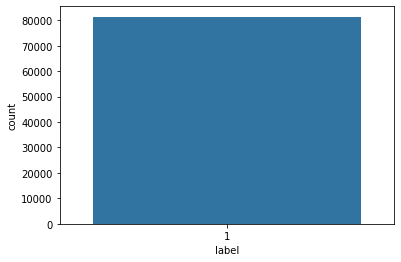

In [ ]:
import seaborn as sns

print(protocol_df.groupby(['label']).size())

sns.countplot(x ='label', data = protocol_df)

In [ ]:
protocol_df = protocol_df.drop_duplicates('date',keep='last')

In [ ]:
protocol_df

,date,cpt_cyc_protocoles,nb_total_pieces,cpt_cyc_machine,temps_cycle,temps_dosage,temps_injection,pression_com,volume_com,matelas,val_pointe,integral,duration,pression,volume,label
0,2022-02-01 22:30:00,7583,30688,7672,27.50,0.00,3.57,779,16.50,10.87,1062,76,31.07,1841,27.37,0
2,2022-02-01 22:31:00,7585,30696,7674,27.28,4.36,3.57,1332,16.50,16.28,1344,125,35.21,2676,32.78,1
4,2022-02-01 22:35:00,7587,30732,7683,26.98,4.09,3.55,1354,16.50,16.26,1374,130,34.62,2728,32.76,1
6,2022-02-01 22:36:00,7589,30740,7685,26.98,4.09,3.56,1350,16.50,16.27,1369,127,34.63,2719,32.77,1
9,2022-02-01 22:37:00,7592,30752,7688,26.94,4.06,3.56,1359,16.49,16.27,1381,128,34.56,2740,32.76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94519,2022-03-28 12:22:00,102106,414080,103520,27.03,4.05,3.49,1349,16.50,16.34,1367,143,34.57,2716,32.84,1
94522,2022-03-28 12:23:00,102109,414092,103523,27.07,4.02,3.48,1343,16.50,16.34,1361,144,34.57,2704,32.84,1
94524,2022-03-28 12:24:00,102111,414100,103525,27.07,4.03,3.48,1349,16.50,16.34,1369,143,34.58,2718,32.84,1
94526,2022-03-28 12:25:00,102113,414108,103527,27.05,4.04,3.48,1352,16.50,16.40,1365,144,34.57,2717,32.90,1


In [ ]:
protocol_df.drop(['duration_c', 'volume_c', 'pression_c'], axis=1, inplace=True)
protocol_df.to_csv('/content/gdrive/MyDrive/Datascience/PFE/datasets/addixo/new_dataset.csv', index=False)

In [ ]:
protocol_df = protocol_df.sort_values(by="date")

In [ ]:
import seaborn as sns
sns.pairplot(protocol_df)

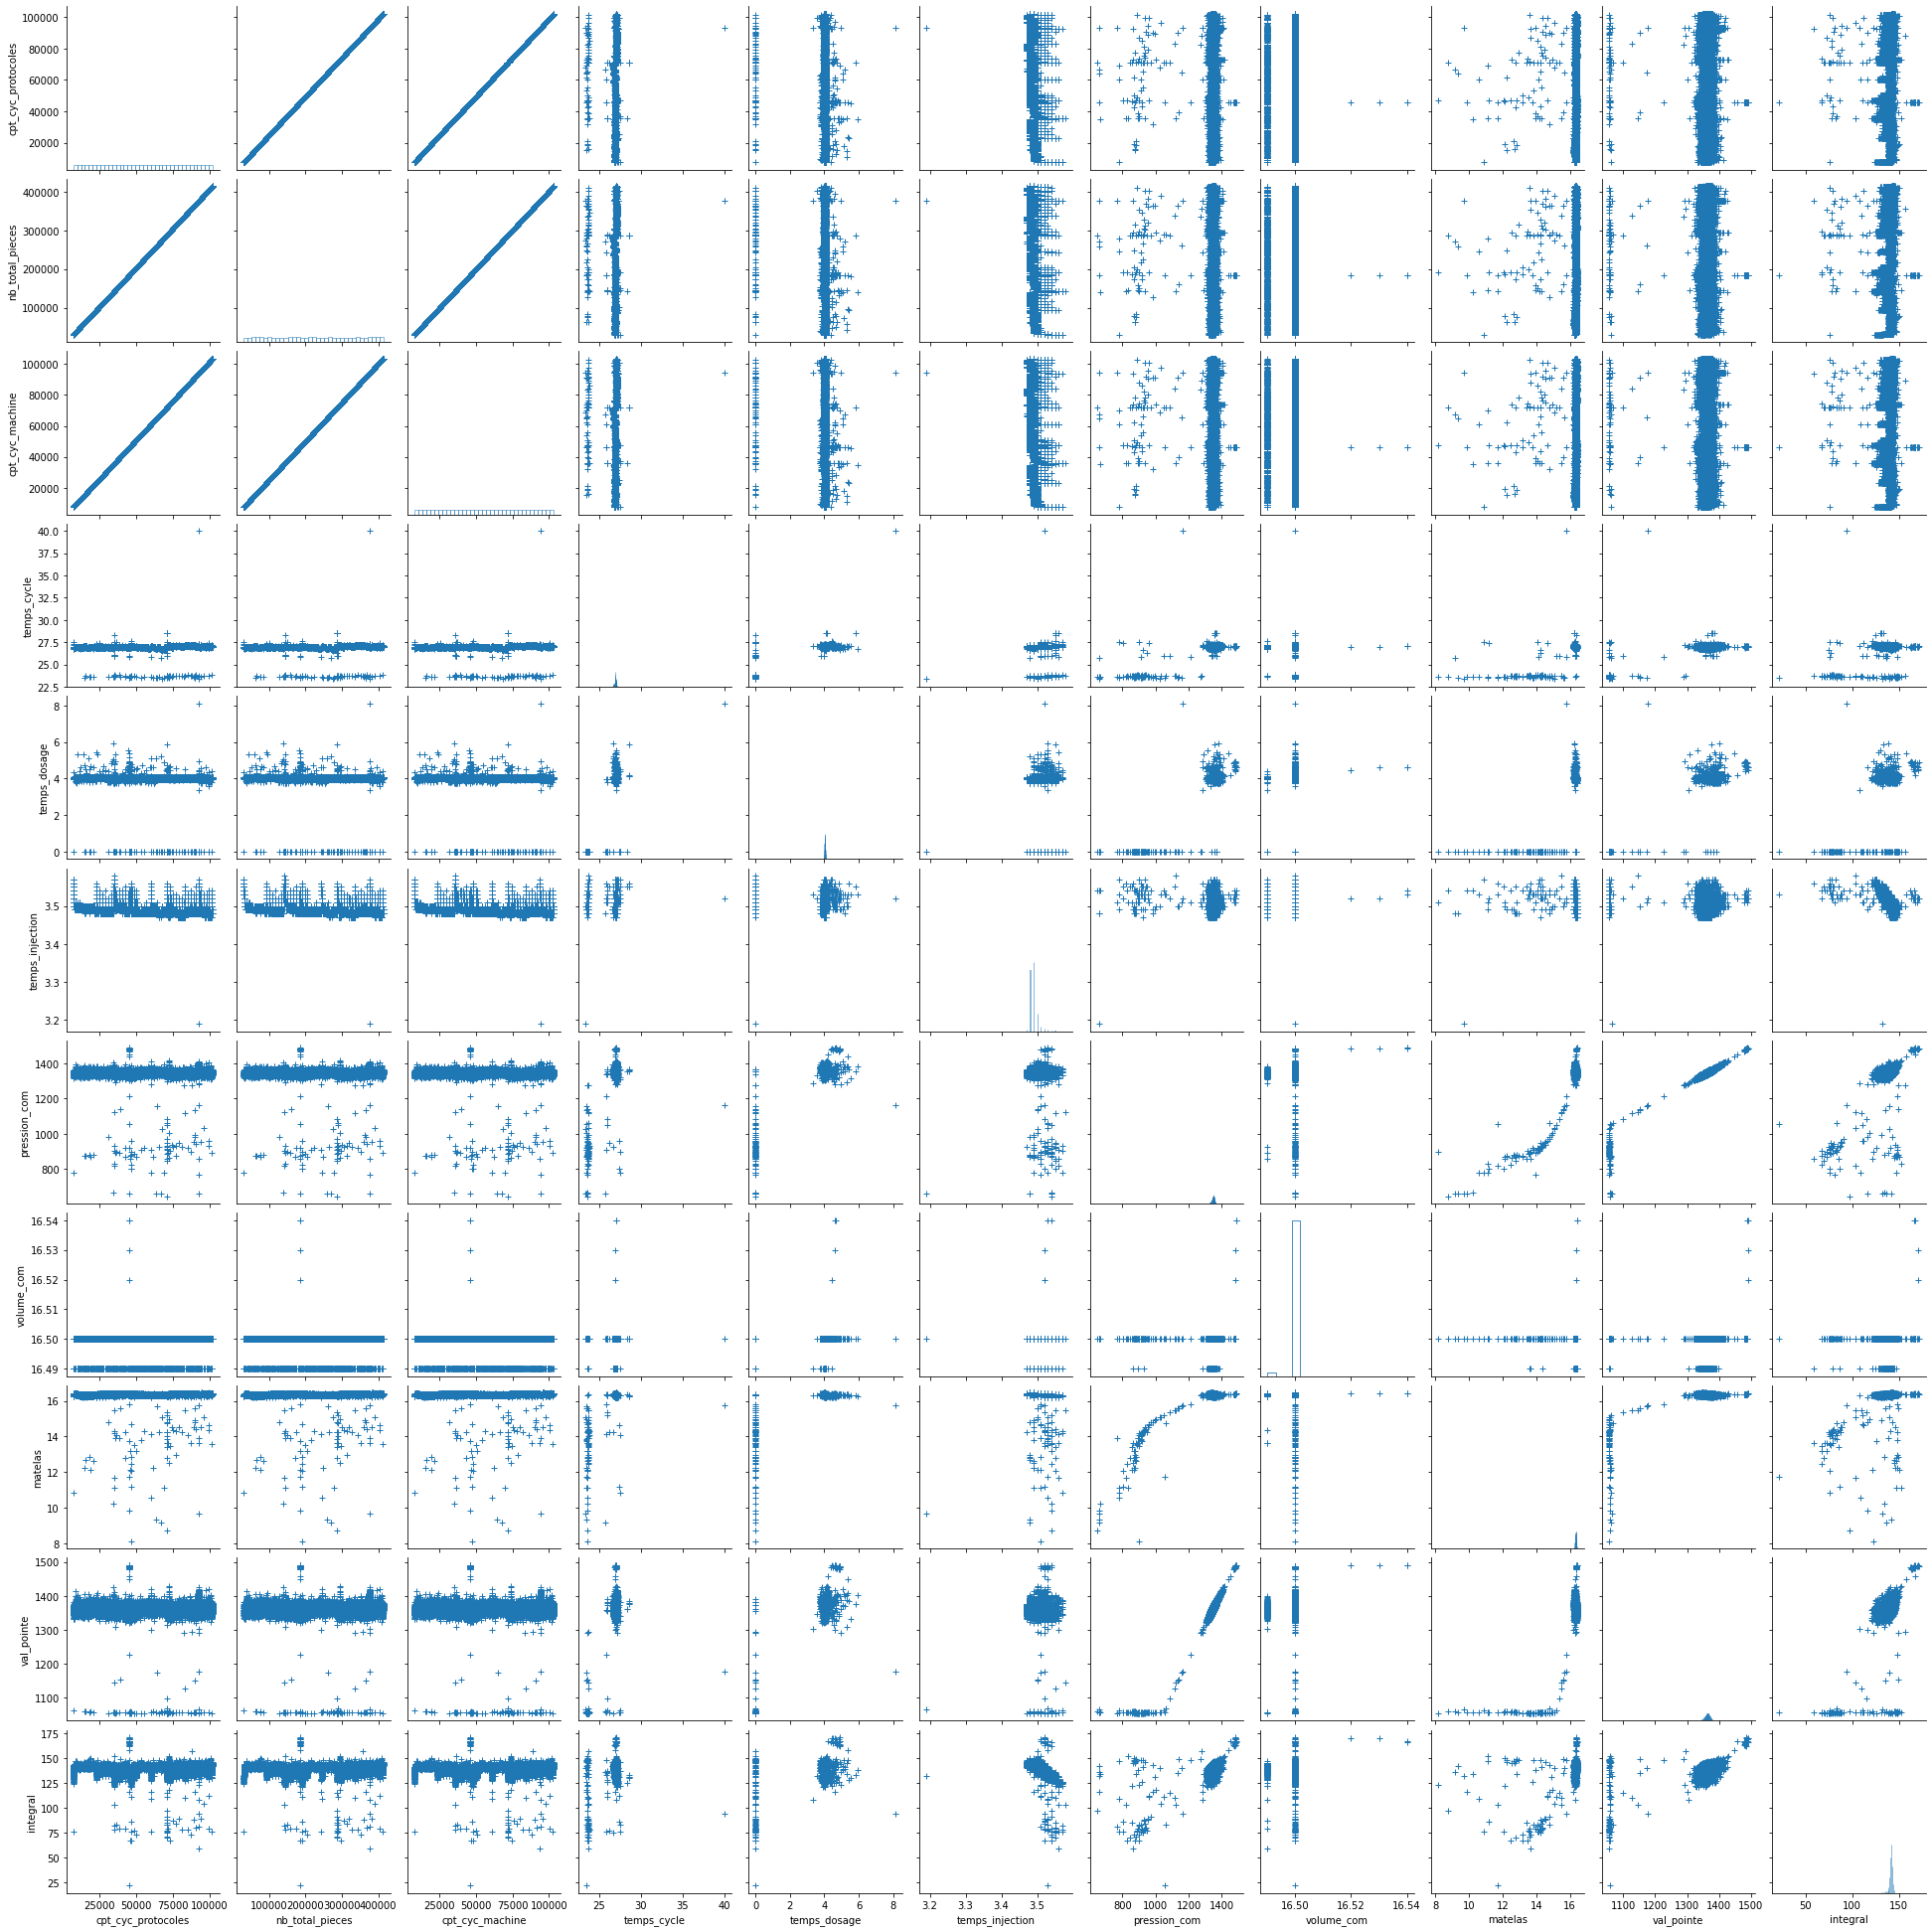

In [ ]:
#protocol_df = pd.read_csv('/content/gdrive/MyDrive/Datascience/PFE/datasets/addixo/new_dataset.csv')
sns.pairplot(
    protocol_df,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)

In [ ]:
protocol_df.columns

Index(['date', 'cpt_cyc_protocoles', 'nb_total_pieces', 'cpt_cyc_machine',
       'temps_cycle', 'temps_dosage', 'temps_injection', 'pression_com',
       'volume_com', 'matelas', 'val_pointe', 'integral', 'duration',
       'pression', 'volume', 'label'],
      dtype='object')

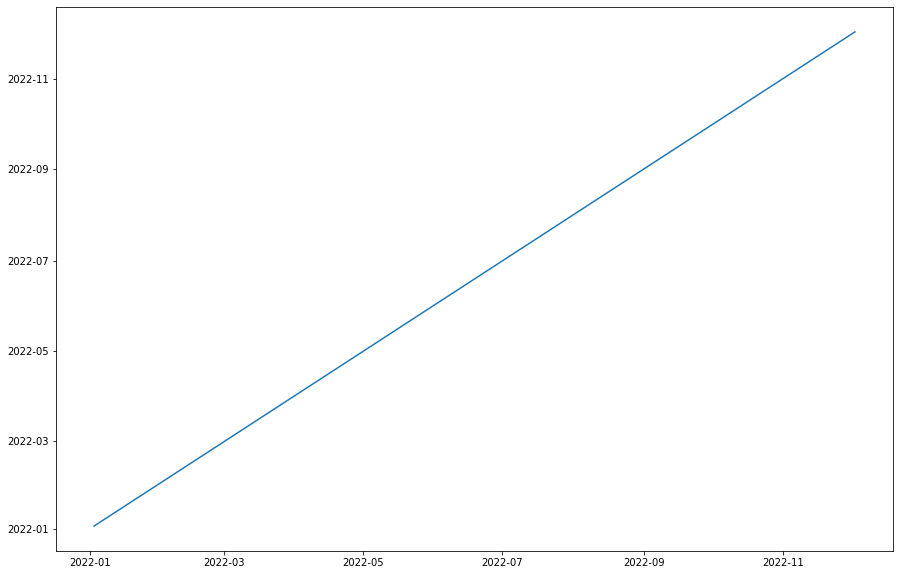

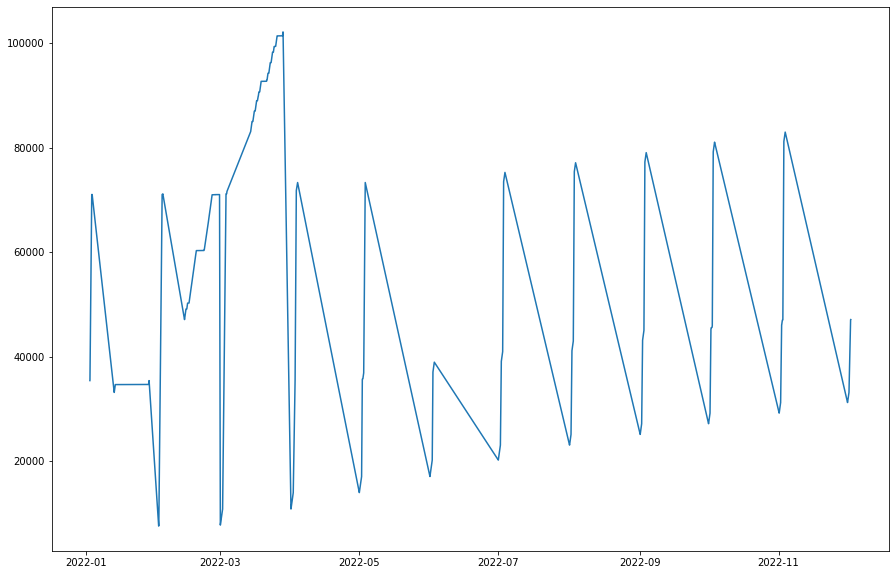

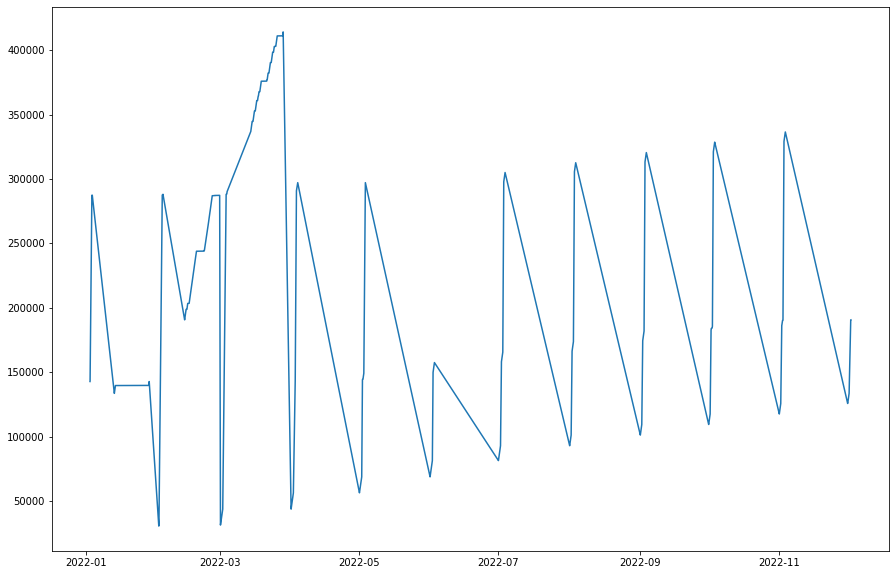

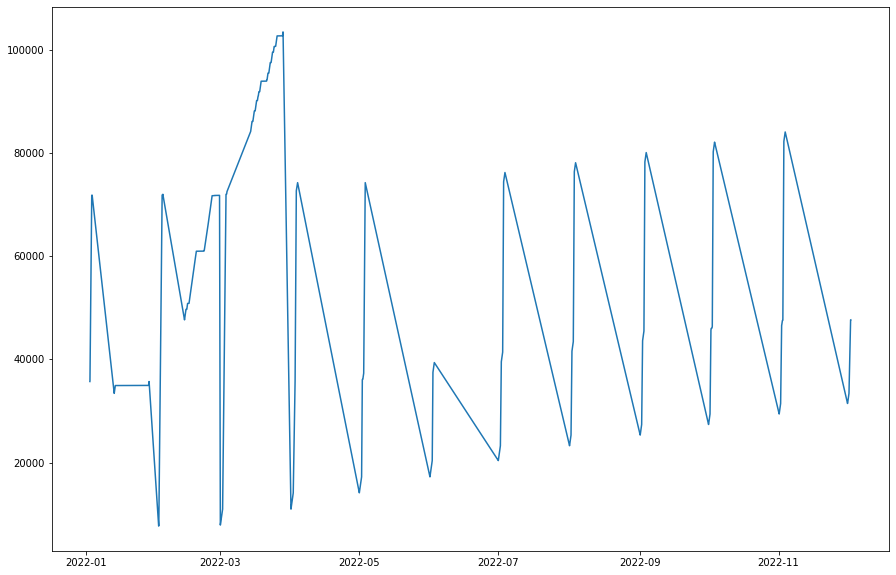

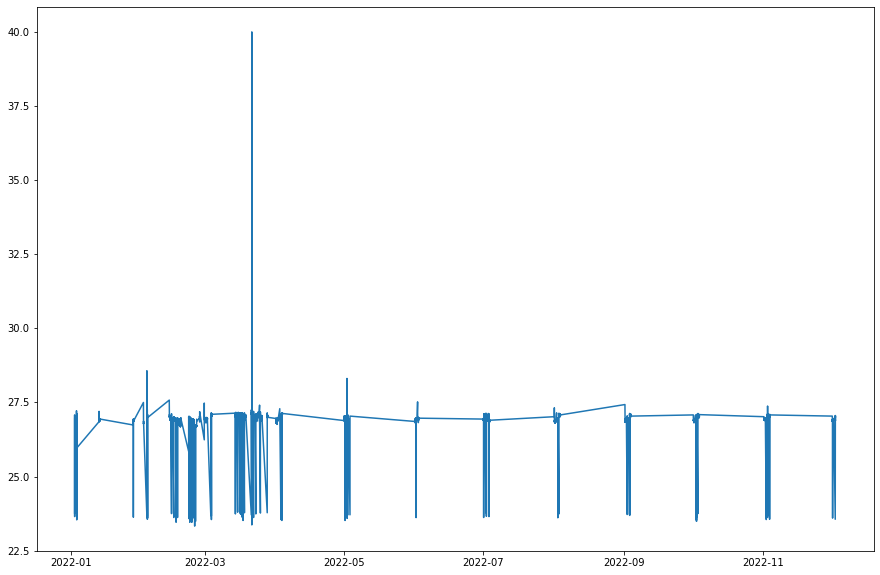

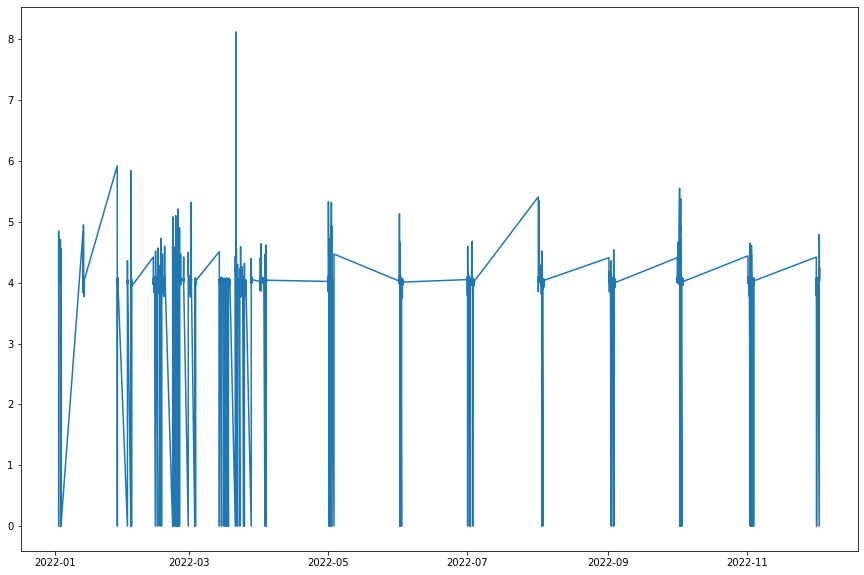

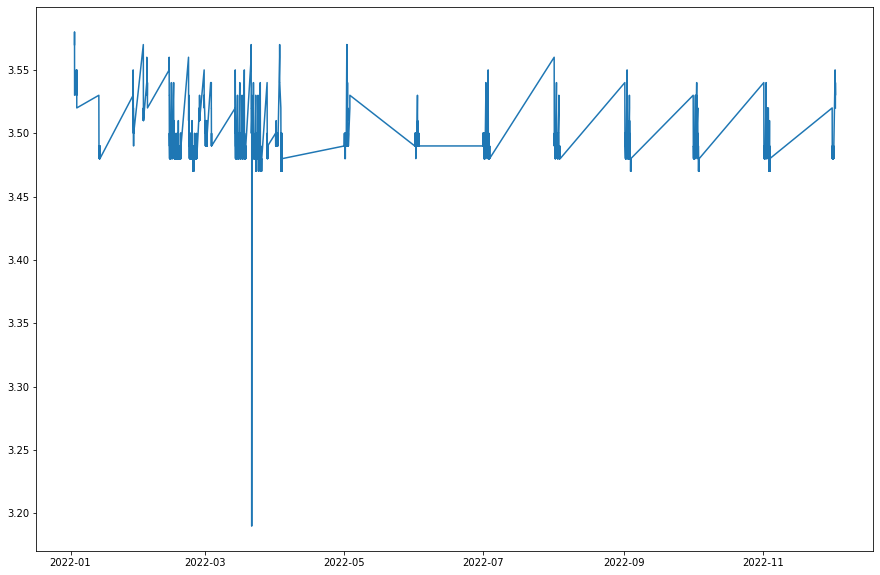

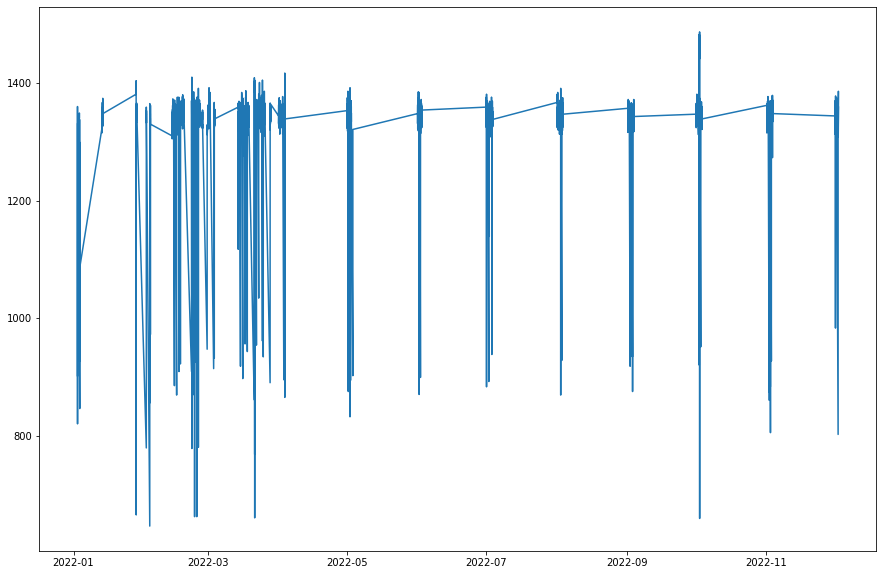

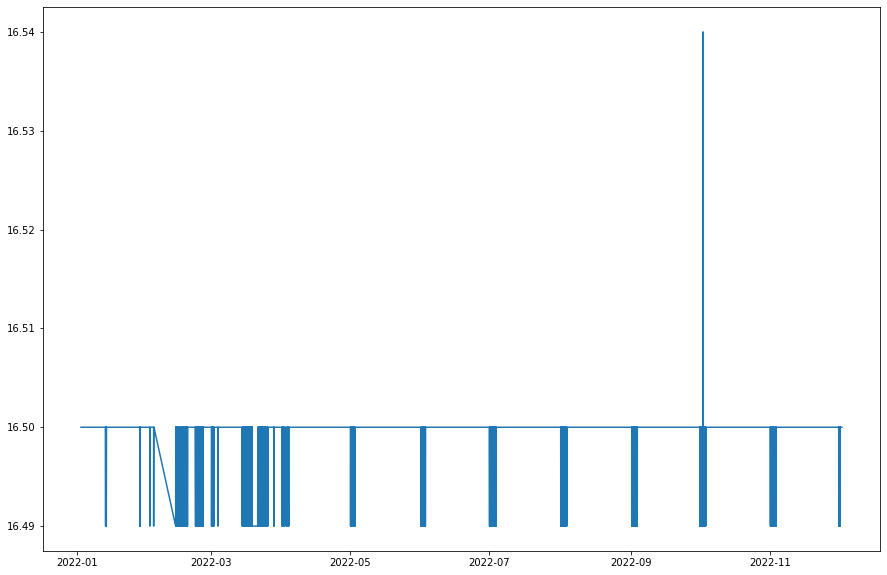

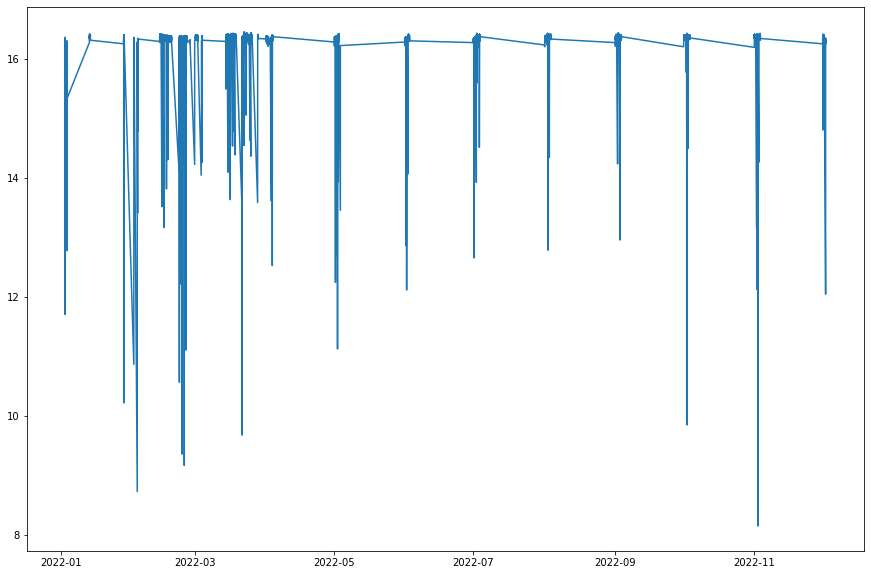

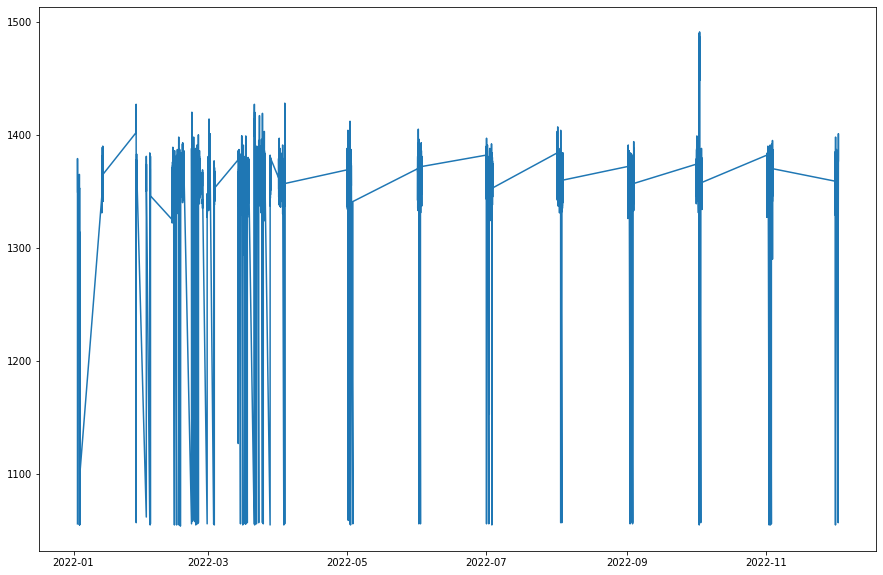

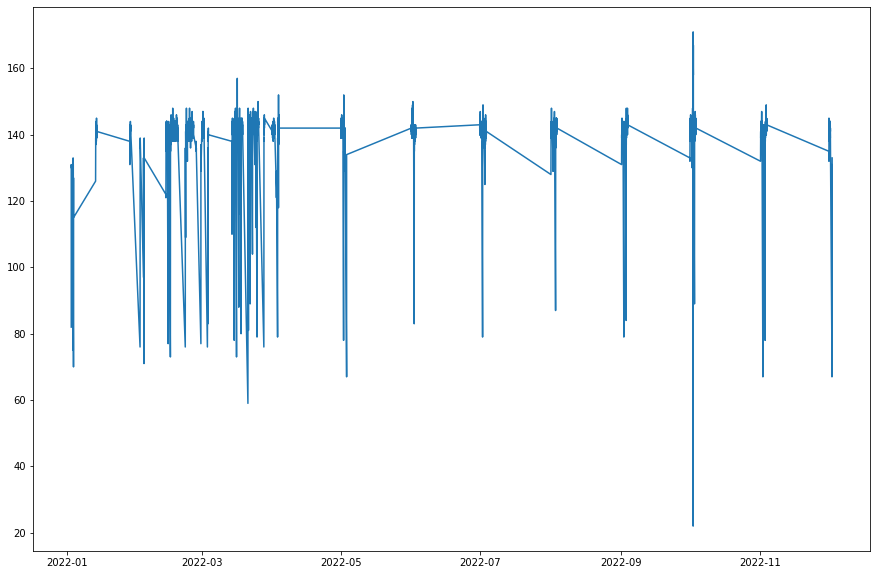

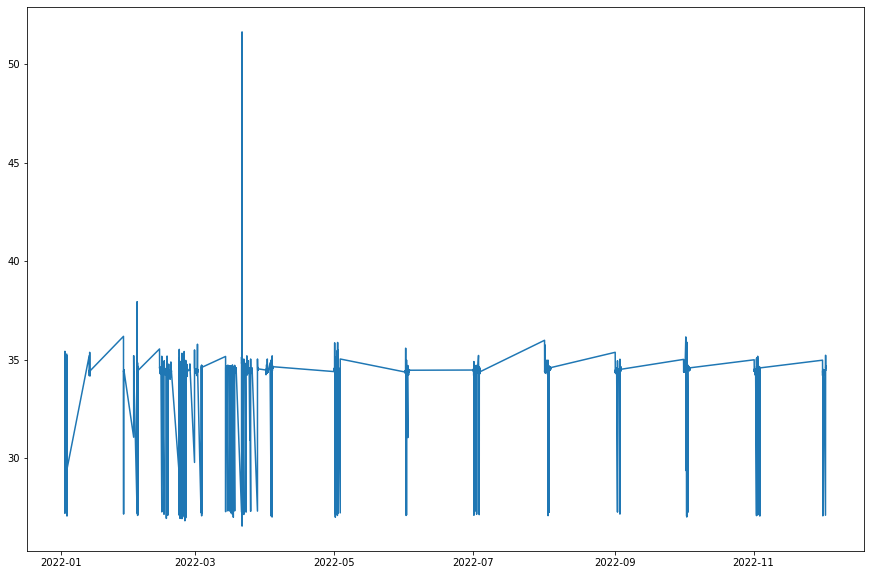

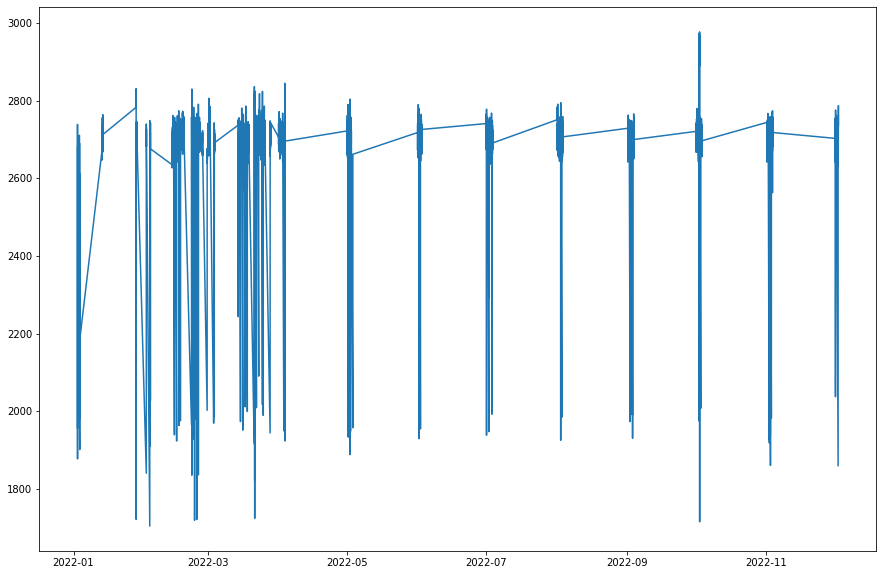

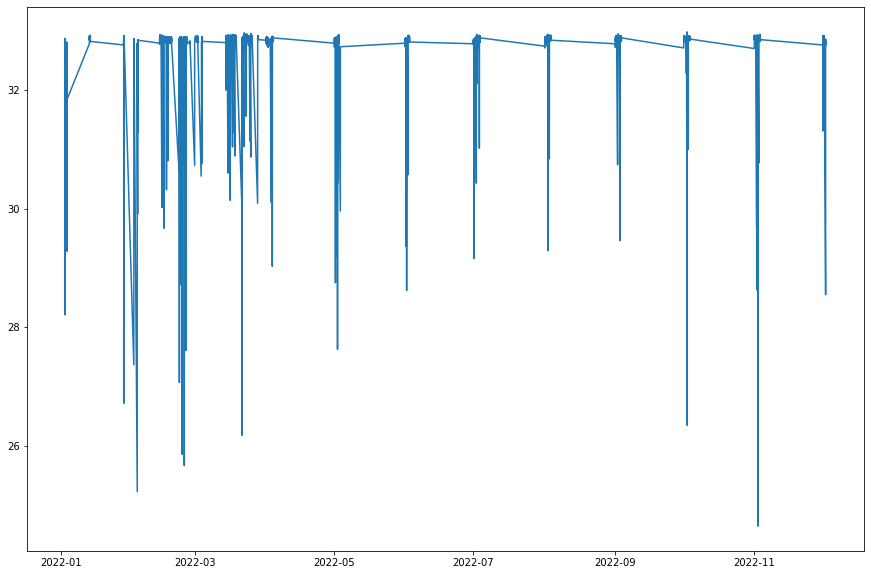

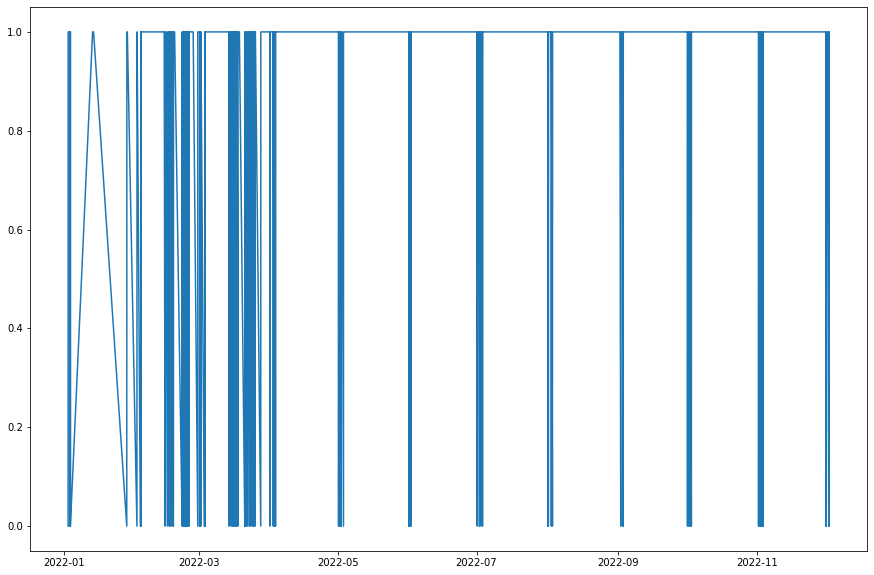

In [ ]:
for col in protocol_df.columns:
  plt.figure(figsize = (15, 10))
  plt.plot(protocol_df["date"], protocol_df[col])
  plt.show();

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, rolling):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(rolling).mean()
    rolstd = timeseries.rolling(rolling).std()

    #Plot rolling statistics:
    plt.figure(figsize=(20, 5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')

    """ plt.xlabel('Time')
    plt.ylabel('% Silica Concentrate')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()"""

    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:') 
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    #print (dfoutput)
    if dfoutput['p-value'] < 0.05:
        print('The timeseries is stationary at 95% level of confidence')
    else:
        print('The timeseries is not stationary at 95% level of confidence')


In [ ]:
protocol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42745 entries, 27830 to 39503
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                42745 non-null  datetime64[ns]
 1   cpt_cyc_protocoles  42745 non-null  int64         
 2   nb_total_pieces     42745 non-null  int64         
 3   cpt_cyc_machine     42745 non-null  int64         
 4   temps_cycle         42745 non-null  float64       
 5   temps_dosage        42745 non-null  float64       
 6   temps_injection     42745 non-null  float64       
 7   pression_com        42745 non-null  int64         
 8   volume_com          42745 non-null  float64       
 9   matelas             42745 non-null  float64       
 10  val_pointe          42745 non-null  int64         
 11  integral            42745 non-null  int64         
 12  duration            42745 non-null  float64       
 13  pression            42745 non-null  int64 

Results of Dickey-Fuller Test:
The timeseries is stationary at 95% level of confidence


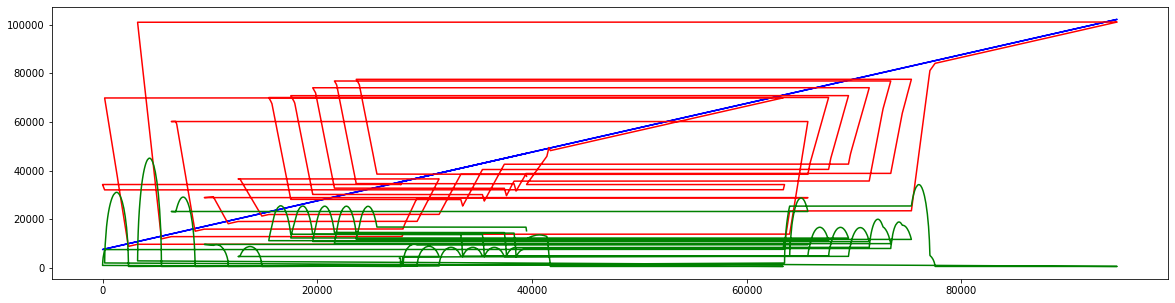

In [ ]:
for col in protocol_df.columns:
  if col != 'date':
    test_stationarity(protocol_df[col], rolling=10)
    break